---
title: YOLO
date: 2020-09-23
category: coal
toc: true
---

이번 포스트에서는 라즈베리파이를 이용해 석탄을 탐지하기 위한 coal 데이터 전처리 과정과 YOLO를 다룹니다.

### YOLO 구조
---

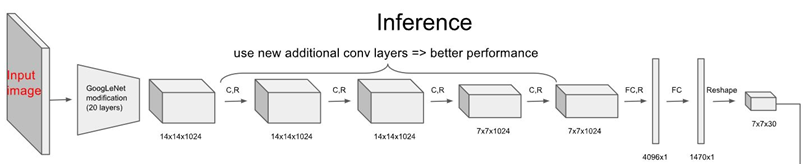

GoogLeNet을 기반으로 한  24 Convolutional layers + 2 Fully Connected layers

### YOLO 출력
---

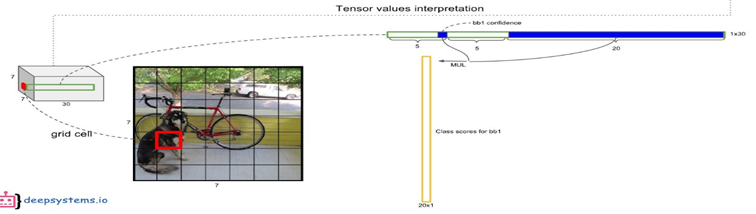

각각의 grid cell에 2개의 bounding box가 있고, 앞 10개의 출력은 각 bounding box의 (중심x,y),(너비와 높이,w,h),객체를 포함할 확률 ***P*** 로 구성
이후 20개(변경 가능)인 각 클래스일 확률을 곱하면 해당 위치에 해당 클래스의 물체가 있을 확률이 도출된다.

### 출력 값 가공
---
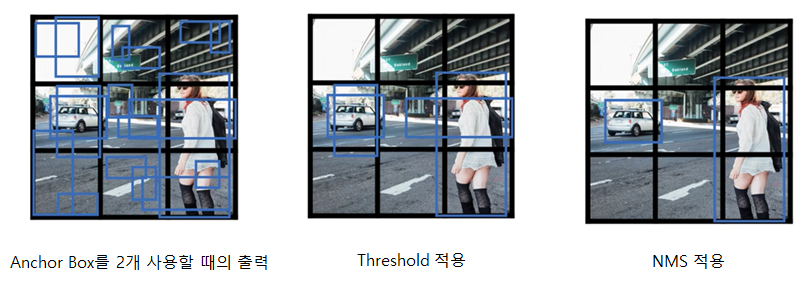

* NMS : 모든 상자를 확률 기준으로 정렬, 가장 높은 확률의 경계 상자를 기준으로 IoU계산, Iou가 IoU임계값보다 높은 상자를 모두 제거

* 경계 상자 : 객체를 둘러싼 가장 작은 사각형
* 앵커 상자 : 특정 크기의 경계상자
* 실측 상자 : 훈련 셋 생성시의 상자

* 훈련과정 : 앵커 상자를 훈련을 통해 조절하여 경계상자 생성하고 실측상자에 맞추어간다.

### 부가 설명
---
1. Cell보다 큰 object 탐지 방법

처음부터 cell 보다 큰 Anchorbox를 사용하고, 물체가 작으면 박스를 줄이고, 크면 키운다.
또, Cell 안에 box의 센터가 존재한다.

2. 5번째 출력 ***P***의 의미

어떤 class에 속할지 모르지만 물체가 있을 확률로,

각 확률 값은 어떤 공식에 의해 명시적으로 유도되는 것이 아니라, 뉴럴 넷에 의해 비명시적으로(implicitly) 도출

3. 비용 함수 및 역전파 

( NMS까지 거친 후 학습 ,
비용 함수 = 경계상자 손실 + 객체 신뢰도 손실 + 분류 손실 )


* 경계상자 손실 : 상자의 좌표와 크기를 예측하기 위해 사용

-> 가중치{(x-목표x)²+(y-목표y)²}+가중치{(w-목표w)²+(h-목표h)²} 

* 객체 신뢰도 손실 : 객체가 존재하는지, 존재하지 않는지 예측하기 위해 사용

-> 사라진 박스 : N

-> 남은 박스 : P

-> 실제와 예측의 IoU 가 threshold 이상이면 TP
아니거나, 더 높은 박스와 threshold 이상 겹치면 FP
없앴는데, 실제 없으면 FN 

-> Precision, Recall 구하고 mAP 적용

* 분류 손실 : 클래스 예측하기 위해 사용


### 모델 평가 지표
---
 Threshold가 낮아지면, 후보가 많아져서 Recall 은 높아지고, 확실하지 않은 후보가 많기 때문에 Precision 은 낮아진다.

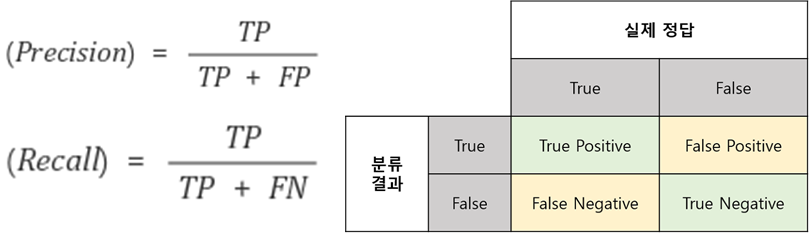

때문에 mAp를 모델 평가 지표로 사용 

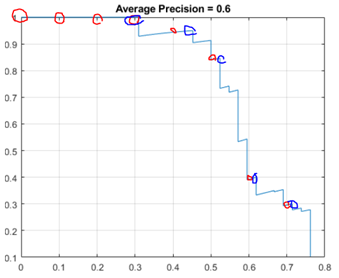

AP : threshold 를 recall이 1일 때부터 0일 때 까지 조금씩 줄여 recall 과 precesion간의 관계를 나타낸 후 해당 11개 recall에 대한 precision의 값 평균을 뜻한다.

mAP: 모든 클래스 별로 AP를 구하고 평균낸 값을 뜻한다.

### YOLO 데이터 전처리
---
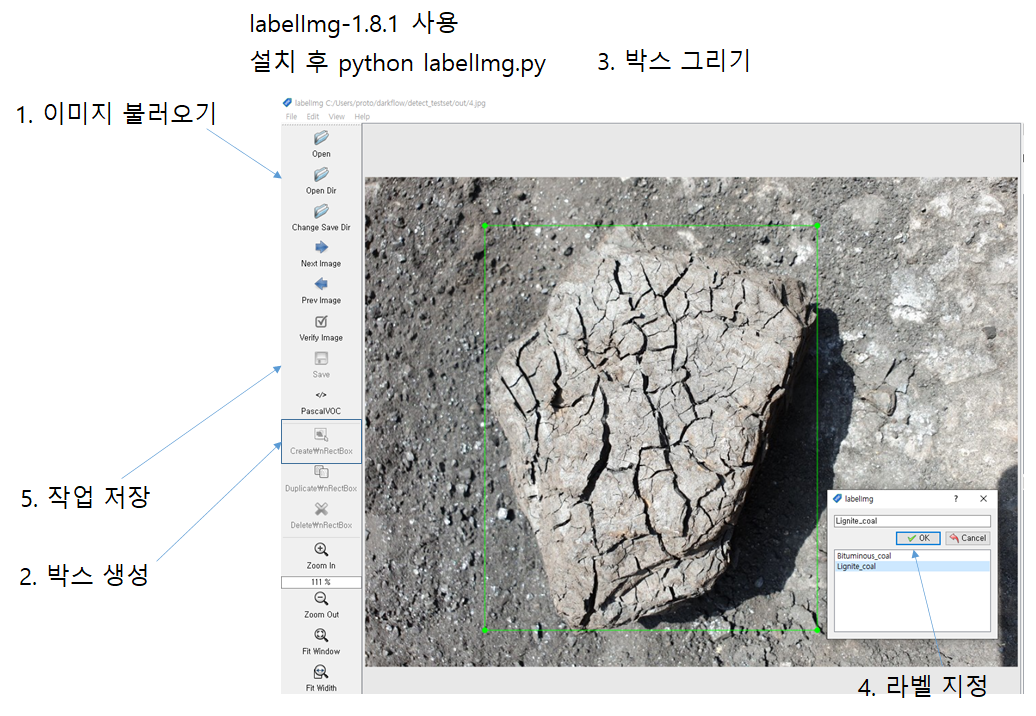

기존 classification 데이터에서 coal 부분에 실측상자를 그리고, 라벨링한다.

### Reference
---

In [ ]:
Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks
You Only Look Once: Unified, Real-Time Object Detection
SSD: Single Shot MultiBox Detector
CornerNet: Detecting Objects as Paired Keypoints
CenterNet: Keypoint Triplets for Object Detection
https://nuggy875.tistory.com/20
